In [80]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-11-20
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [82]:
# Data Preparation

MCMC_data_set1 = "./MCMC_data_set_with_errorbars1.txt"

open_MCMC_data_set1 = open(MCMC_data_set1, "r")

df_MCMC_data_set1 = pd.read_csv(MCMC_data_set1, sep = ' ', names=["x", "y", "error"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

#df_MCMC_data_set1.plot(kind='line', x="x", y="y", title="MCMC_data_set1 data plot")
plt.show()

x = df_MCMC_data_set1["x"]
y = df_MCMC_data_set1["y"]
error = df_MCMC_data_set1["error"]

data_x = Cal_sample_statistic(x)
x_sigma = data_x.StandardDeviation()
data_y = Cal_sample_statistic(y)
y_sigma = data_y.StandardDeviation()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


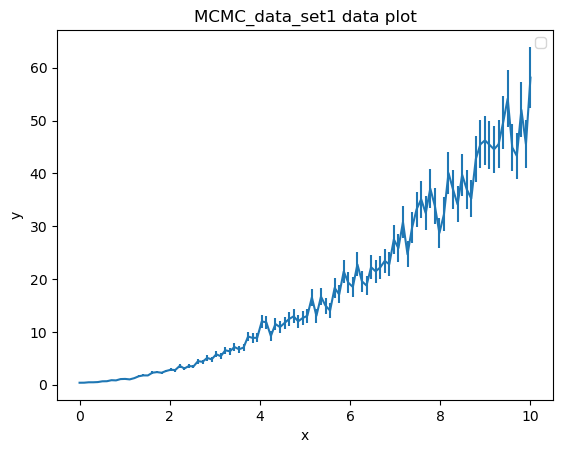

In [83]:
# Plot the true data and the best-fit quadratic model
plt.errorbar(x, y, yerr=error)
#plt.scatter(x, y, label="True Data")
#plt.plot(x, quadratic_model(x, best_a, best_b, best_c), color='red', label="Best-fit Quadratic Model")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('MCMC_data_set1 data plot')
plt.show()

[0.49191251957786053, 0.7021767110222804, 0.47049193560631564]


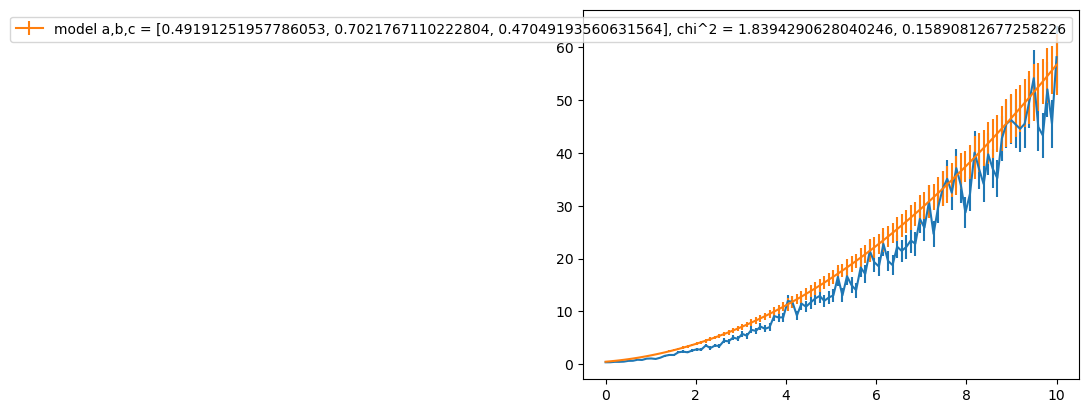

In [84]:
import numpy as np
from scipy.stats import norm
import random

# Define the quadratic model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

chain = []
a_old, b_old, c_old = 0.5, 0.5, 0.5
old_pos = [a_old, b_old, c_old]
chain.append(old_pos)

def chi_squared(y, model, sigma):
    sum = 0
    for i in range(len(y)):
        Chi_squared = (y[i]-model[i])**2/sigma**2
        sum = sum + Chi_squared

    return sum

# Calculate the likelihood
old_likelihood = np.exp(-chi_squared(y, quadratic_model(x, *old_pos), y_sigma))
#print(old_likelihood)

# make new positions
record = []
new_position_list = []
new_pos = []
new_likelihood_list = []
chis = []
for i in range(1000):
    a_new, b_new, c_new = a_old + np.random.normal(0, 0.1), b_old+ np.random.normal(0, 0.1), c_old + np.random.normal(0, 0.1)
    # step size
    new_pos = [a_new, b_new, c_new]
    
    # Calculate the likelihood
    chi = chi_squared(y, quadratic_model(x, *new_pos), y_sigma)
    new_likelihood = np.exp(-chi)
    #print(new_likelihood)
    
    if new_likelihood > old_likelihood:
        new_position_list.append(new_pos)
        chis.append(chi)
        new_position_list.append(new_pos)
        new_likelihood_list.append(new_likelihood)
        old_pos = new_pos
    elif new_likelihood < old_likelihood:
        rd = random.random()
        if rd < new_likelihood/old_likelihood:
            record.append(new_pos)
            chis.append(chi)
            new_position_list.append(new_pos)
            new_likelihood_list.append(new_likelihood)
            old_pos = new_pos
        else:
            record.append(old_pos)
            chis.append(chi)
            new_position_list.append(old_pos)
            new_likelihood_list.append(old_likelihood)
            old_pos = old_pos


minimum_chi = min(chis)
index = chis.index(minimum_chi)
print(new_position_list[index])
#new_likelihood[index]
#new_pos[index]

plt.figure()
plt.errorbar(x, y, yerr=error)
plt.errorbar(x, quadratic_model(x, *new_position_list[index]), yerr=error, label=f"model a,b,c = {new_position_list[index]}, chi^2 = {minimum_chi}, {new_likelihood_list[index]}")
plt.legend()
plt.show()


In [85]:
a_list = []
b_list = []
c_list = []
for i in range(len(new_position_list)):
    new_pos = new_position_list[i]
    a_list.append(new_pos[0])
    b_list.append(new_pos[1])
    c_list.append(new_pos[2])

peak_a = new_position_list[index][0]
peak_b = new_position_list[index][1]
peak_c = new_position_list[index][2]

peak_a = round(peak_a,2)
peak_b = round(peak_b,2)
peak_c = round(peak_c,2)

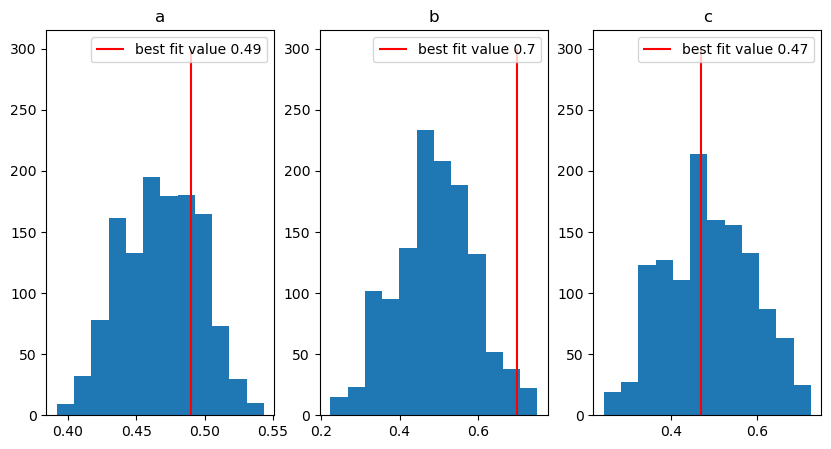

In [89]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(a_list, bins=12)
plt.vlines(peak_a, ymin=0, ymax=300, colors="r", label=f"best fit value {peak_a}")
plt.title('a')
plt.legend()

plt.subplot(1,3,2)
plt.hist(b_list, bins=12)
plt.vlines(peak_b, ymin=0, ymax=300, colors="r", label=f"best fit value {peak_b}")
plt.title('b')
plt.legend()

plt.subplot(1,3,3)
plt.hist(c_list, bins=12)
plt.vlines(peak_c, ymin=0, ymax=300, colors="r", label=f"best fit value {peak_c}")
plt.title('c')
plt.legend()
plt.show()

Parameter a in chain MCMC_data_set1 is not constrained
Parameter b in chain MCMC_data_set1 is not constrained
Parameter c in chain MCMC_data_set1 is not constrained


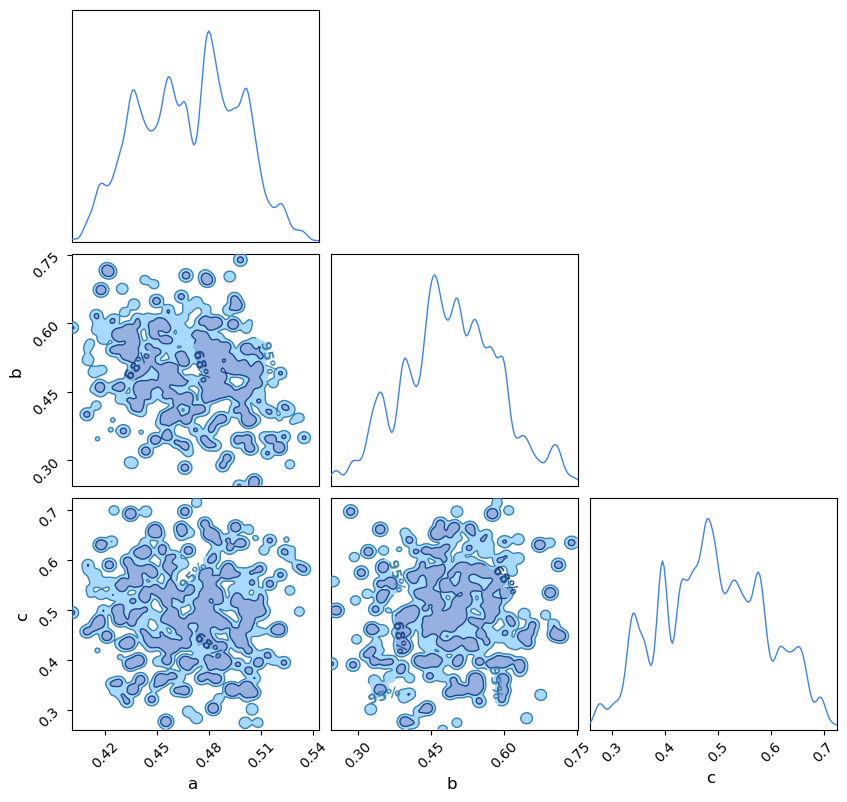

In [87]:
from chainconsumer import Chain, ChainConsumer, make_sample, PlotConfig

df = pd.DataFrame({"a":a_list, "b":b_list, "c":c_list})
c = ChainConsumer()
c.add_chain(Chain(
    samples=df, 
    name="MCMC_data_set1", 
    show_contour_labels=True,))
fig = c.plotter.plot()